# AirBnB Data Analysis- Chicago

In [77]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly_express as px

In [35]:
#Importing Dataset
airbnb = pd.read_csv(r'C:\Users\Kriti\Desktop\Projects\AirBnB\Dataset\listings_june.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,85,3,184,2021-06-12,2.46,1,327
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85373,-87.69540,Entire home/apt,91,2,397,2021-06-06,4.17,1,175
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,65,2,401,2021-05-22,3.34,1,285
3,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,148,4,27,2021-06-07,0.31,10,96
4,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,11,2021-05-09,0.14,1,235


In [36]:
airbnb.shape

(6335, 16)

In [37]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

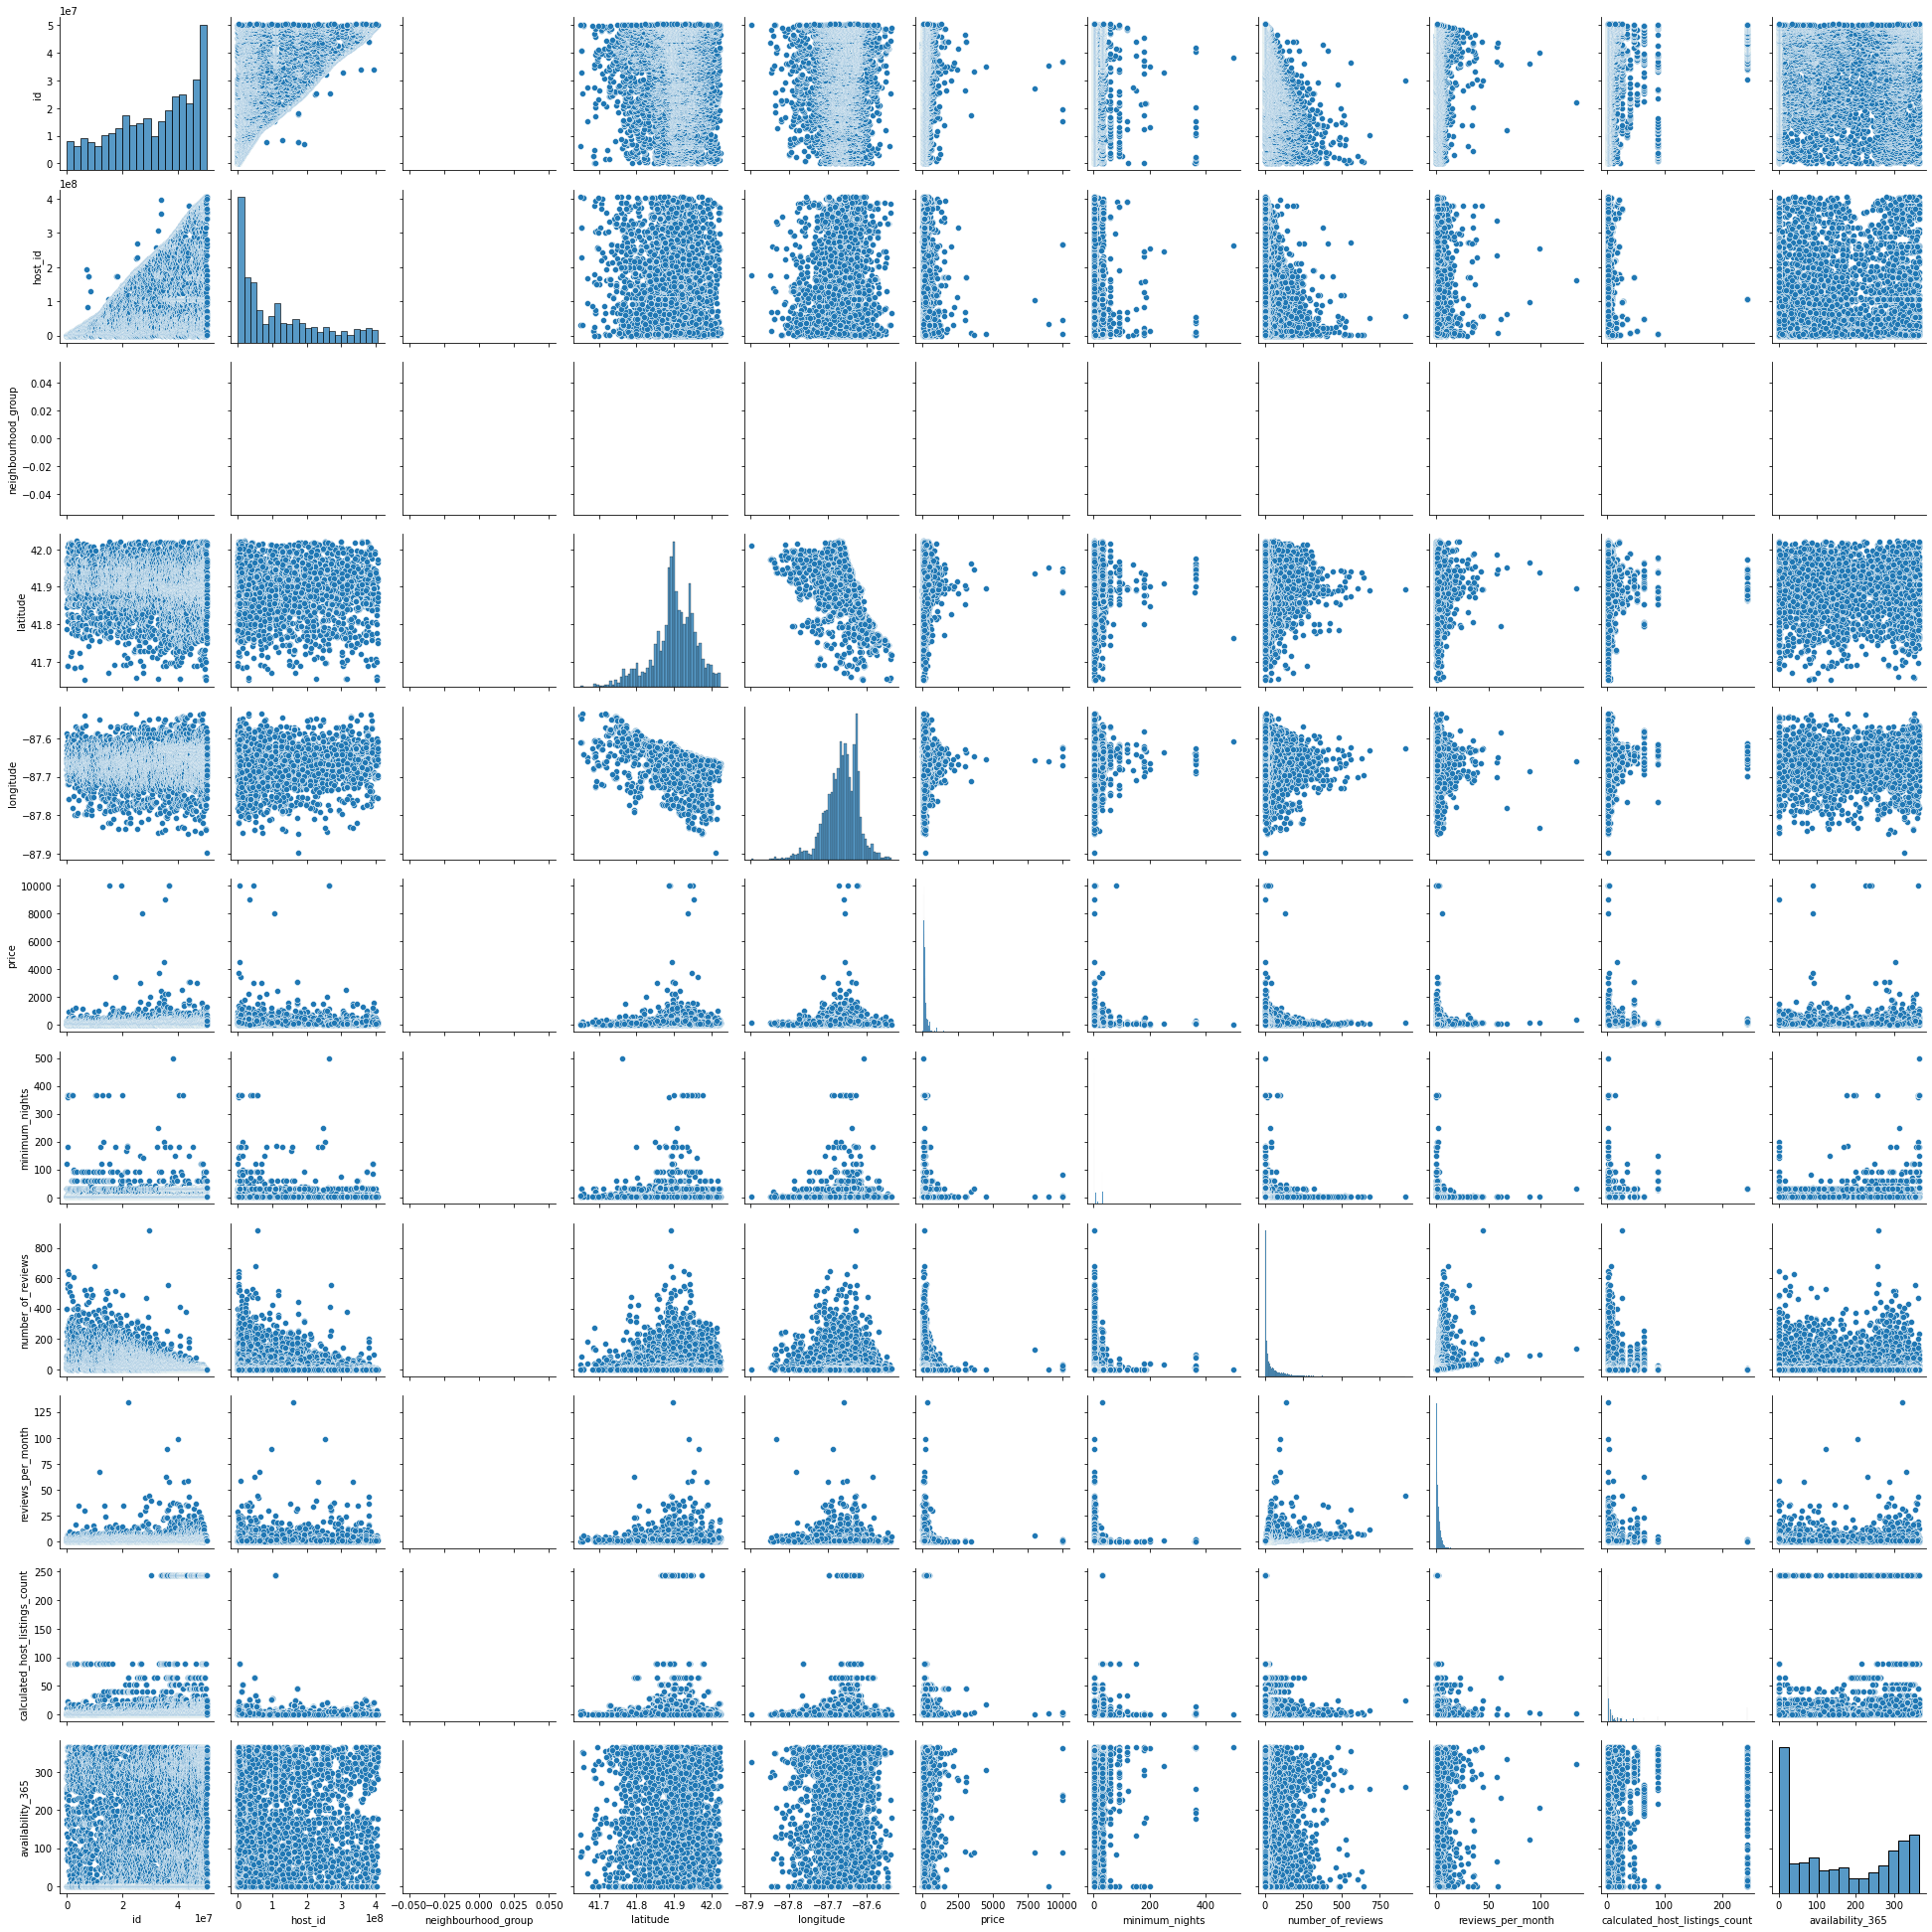

In [38]:
sns.pairplot(airbnb)

<AxesSubplot:>

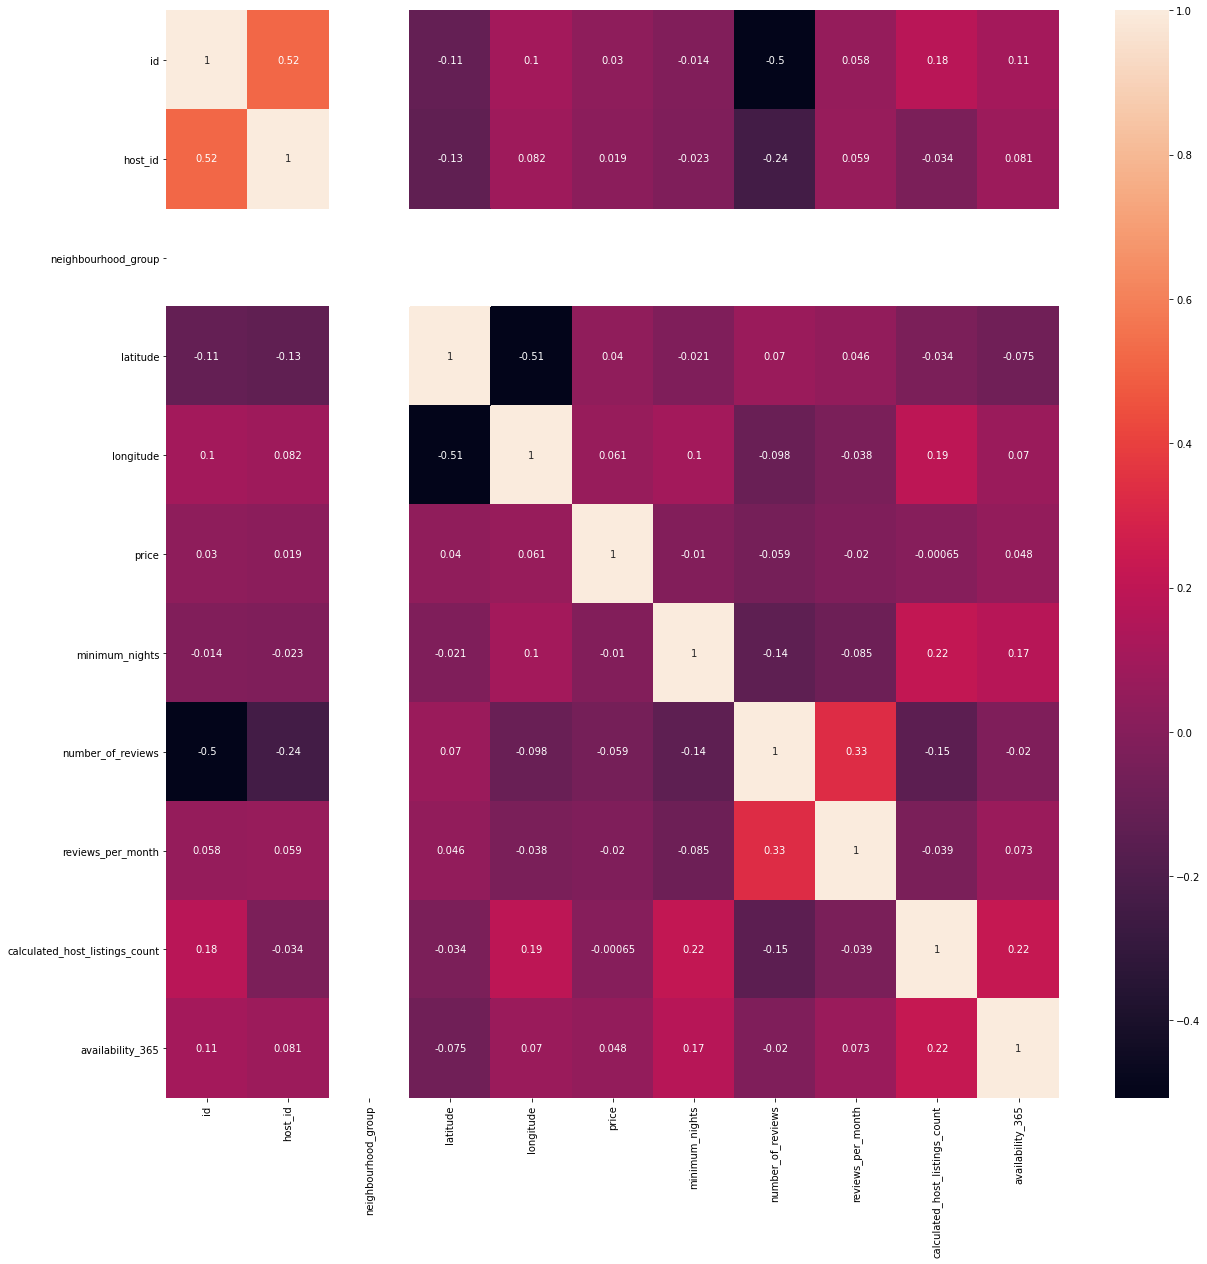

In [39]:
cormap = airbnb.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cormap, annot = True)

In [40]:
airbnb['neighbourhood_group'].unique()

array([nan])

In [41]:
airbnb['neighbourhood'].unique()

array(['Hyde Park', 'South Lawndale', 'West Town', 'Lincoln Park',
       'Near North Side', 'Logan Square', 'Uptown', 'Near South Side',
       'North Center', 'Albany Park', 'Pullman', 'West Ridge',
       'Near West Side', 'Edgewater', 'Bridgeport', 'Kenwood',
       'Lake View', 'Loop', 'Lincoln Square', 'Grand Boulevard',
       'Forest Glen', 'Lower West Side', 'East Garfield Park',
       'Rogers Park', 'North Lawndale', 'Oakland', 'Beverly', 'Chatham',
       'Mckinley Park', 'Woodlawn', 'Avondale', 'Humboldt Park',
       'Norwood Park', 'Portage Park', 'Washington Park', 'Morgan Park',
       'Dunning', 'West Lawn', 'South Shore', 'Irving Park',
       'Armour Square', 'South Deering', 'West Garfield Park', 'Hermosa',
       'Douglas', 'Hegewisch', 'North Park', 'Greater Grand Crossing',
       'West Elsdon', 'Jefferson Park', 'Ashburn', 'Belmont Cragin',
       'Garfield Ridge', 'Austin', 'Brighton Park', 'West Pullman',
       'Archer Heights', 'Edison Park', 'Mount Greenwo

In [42]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [45]:
airbnb.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group               6335
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1168
reviews_per_month                 1168
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [46]:
airbnb=airbnb.drop(columns=['neighbourhood_group'])

In [ ]:
airbnb.drop(['neighbourhood_group '],axis=1,inplace=True)

In [43]:
price_corr = airbnb.corr()['price'].sort_values(ascending = False).head(6)[1:]
price_corr

longitude           0.060607
availability_365    0.048123
latitude            0.039563
id                  0.030051
host_id             0.019342
Name: price, dtype: float64

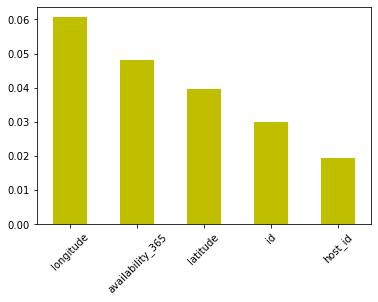

In [44]:
price_corr.plot(kind = 'bar', color = 'y');
plt.xticks(rotation=45);

In [47]:
airbnb.sort_values(by=['price'],ascending=False).head(60)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1071,15287352,Wrigleyville Mansion - Sleeps 16+,45401863,Joe,Lake View,41.949530,-87.670110,Entire home/apt,9999,7,16,2018-11-23,0.50,2,88
3440,36668235,Steps from Mag Mile - 2 Queen Beds Boutique Hotel,265201380,St Jane,Loop,41.885710,-87.625850,Hotel room,9999,1,22,2020-03-08,1.24,3,236
1466,19643452,Large 1 bedroom with Private Bath,4404730,Kyle,Lake View,41.940090,-87.648160,Private room,9999,80,2,2017-08-08,0.04,1,363
3439,36668214,Steps from Mag Mile -Suite in Boutique Hotel,265201380,St Jane,Loop,41.887390,-87.623870,Hotel room,9999,1,3,2019-08-25,0.13,3,227
3438,36667074,Steps from Mag Mile - King Bed Boutique Hotel,265201380,St Jane,Loop,41.885960,-87.623830,Hotel room,9999,1,32,2020-03-16,2.11,3,241
3265,35421741,"BIG Unit, Wrigleyville, Step to Wrigley, Metro",34697612,Harry,Lake View,41.951410,-87.658890,Entire home/apt,9000,2,0,NaN,NaN,2,0
2360,27282179,"Lakeview Near IL Masonic & DePaul, Parking",104419572,John,Lake View,41.935690,-87.656330,Entire home/apt,8000,2,132,2020-03-20,5.85,1,88
3220,35060034,Open House Contemporary Elegant Modern Design,5228189,Matthew,West Town,41.894990,-87.654780,Entire home/apt,4500,1,0,NaN,NaN,17,304
3008,33251879,Furnished Lux Monthly Rental Heart of E. Lakeview,1254363,Mark,Lake View,41.945490,-87.645790,Entire home/apt,3690,31,0,NaN,NaN,3,88
1267,17506473,Spacious Classy Condo 3 mi. from Wrigley,6238433,Anna,Albany Park,41.961890,-87.711590,Entire home/apt,3429,20,12,2017-08-06,0.26,2,83


In [57]:
airbnb.describe()[['price']]

,price
count,6335.000000
mean,179.755801
std,377.374949
min,0.000000
25%,74.000000
50%,117.000000
75%,193.000000
max,9999.000000


In [66]:
#airbnb.groupby(['neighbourhood']).mean()['price']
airbnb.groupby(airbnb['neighbourhood'])['price'].mean().sort_values(ascending = False)

neighbourhood
Loop               306.281690
Lake View          268.070053
West Englewood     260.250000
Near North Side    240.372061
Lincoln Park       222.393103
                      ...    
Chicago Lawn        59.000000
Calumet Heights     54.791667
Mount Greenwood     48.800000
South Chicago       39.437500
Riverdale           20.666667
Name: price, Length: 76, dtype: float64

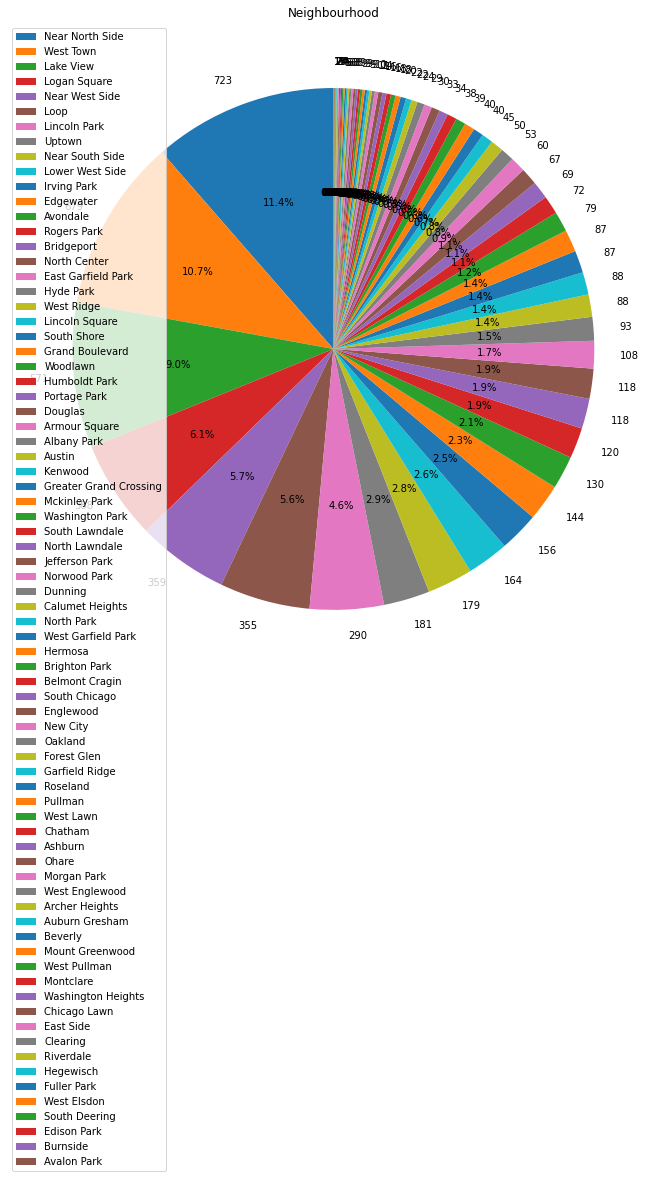

In [74]:
labels = airbnb.neighbourhood.value_counts().index

shape = airbnb.neighbourhood.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = None, labels=shape, colors= None, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood')
plt.show()

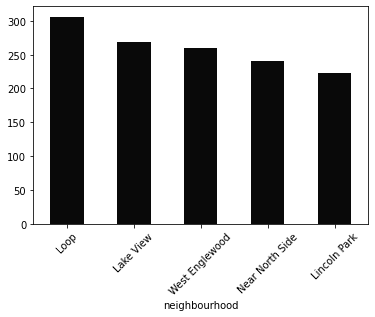

In [86]:
a = airbnb.groupby(airbnb['neighbourhood'])['price'].mean().sort_values(ascending = False).head(5)
a.plot(kind = 'bar', color = '#090909');
plt.xticks(rotation=45);

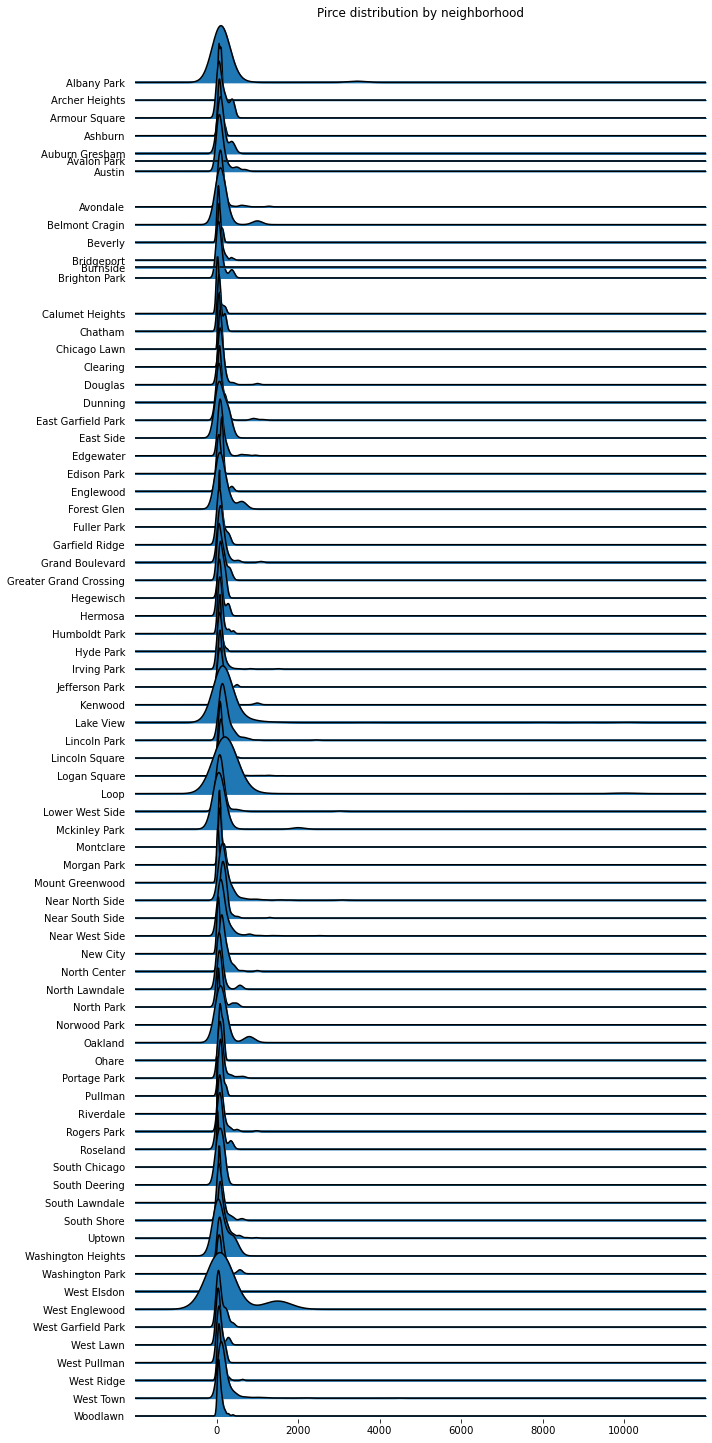

In [71]:
import joypy
# Draw Plot
fig, axes = joypy.joyplot(airbnb, column=['price'], by="neighbourhood", ylim='own', figsize=(10,20))

# Decoration
plt.title('Pirce distribution by neighborhood')
plt.show()

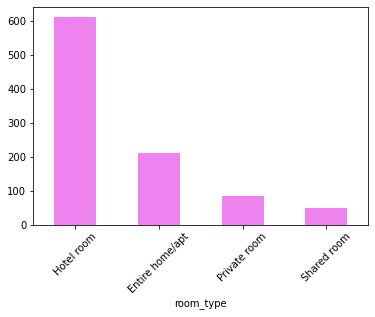

In [72]:
a = airbnb.groupby(airbnb['room_type'])['price'].mean().sort_values(ascending = False).head(5)
a.plot(kind = 'bar', color = 'violet');
plt.xticks(rotation=45);

In [83]:
fig=px.scatter(airbnb, x='price', y='number_of_reviews',
           color='neighbourhood',size='number_of_reviews',size_max=30)
fig.update_layout(autosize=False,width=800,height=1000)
fig